In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [13]:
cap = cv.VideoCapture("data/0001-0030.avi")

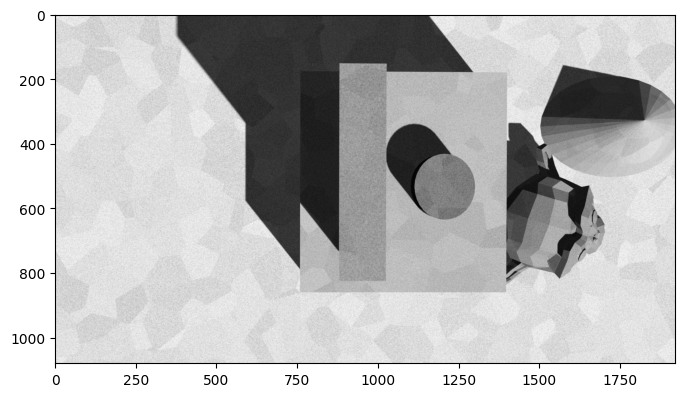

In [7]:
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255
plt.imshow(prev_gray, cmap='gray')

In [9]:
while(cap.isOpened()):
    ret, frame = cap.read()
    cv.imshow("input", frame)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    rgb -= rgb.mean(dtype=np.uint8)
    cv.imshow("dense optical flow", rgb)
    prev_gray = gray
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


: 

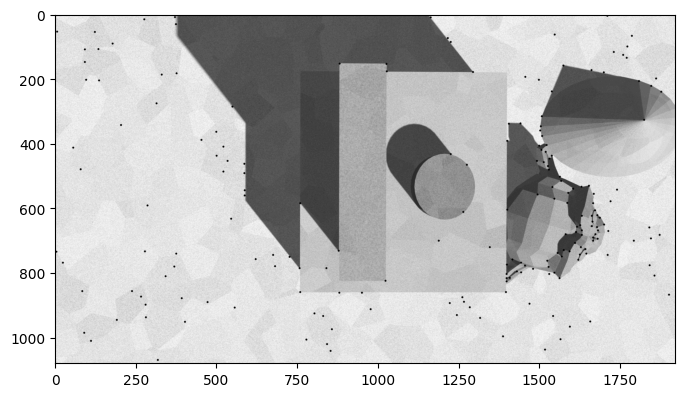

(<matplotlib.image.AxesImage at 0x2630b900090>, None)

In [3]:
ret, img = cap.read()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,200,0.01,10)
corners = np.intp(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(gray,(x,y),3,(255,0,0),-1)

ret, next_img = cap.read()
next_gray = cv.cvtColor(next_img,cv.COLOR_BGR2GRAY)
next_corners = cv.goodFeaturesToTrack(next_gray,200,0.01,10)
next_corners = np.intp(next_corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(gray,(x,y),3,(0,255,0),-1)
plt.imshow(gray, cmap='gray'),plt.show()

In [4]:
cost = np.zeros((len(corners), len(next_corners)))
cost.size

40000

In [5]:
for c, corner in enumerate(corners):
    for n, next_corner in enumerate(next_corners):
        cost[c][n] = np.linalg.norm(corner - next_corner)

In [6]:
from scipy.optimize import linear_sum_assignment

In [7]:
row_ind, col_ind = linear_sum_assignment(cost)

In [8]:
cost[row_ind, col_ind].sum()

7217.36736113851

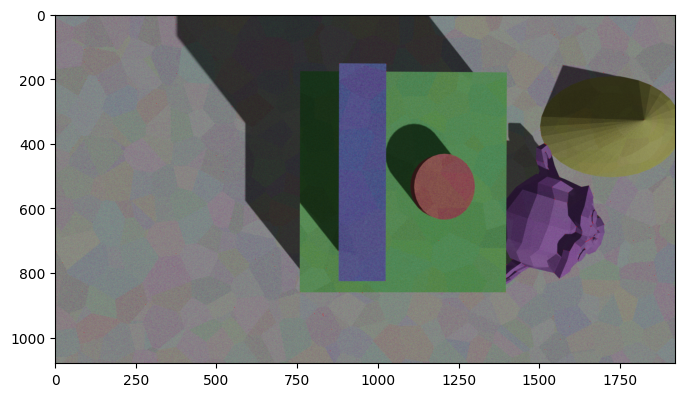

In [9]:
for r, c in zip(row_ind, col_ind):
    if cost[r, c] < 30:
        cv.line(next_img, *corners[r], *next_corners[c], (255,0,0), 1)
plt.imshow(next_img)

In [10]:
len(row_ind), len(col_ind)

(200, 200)

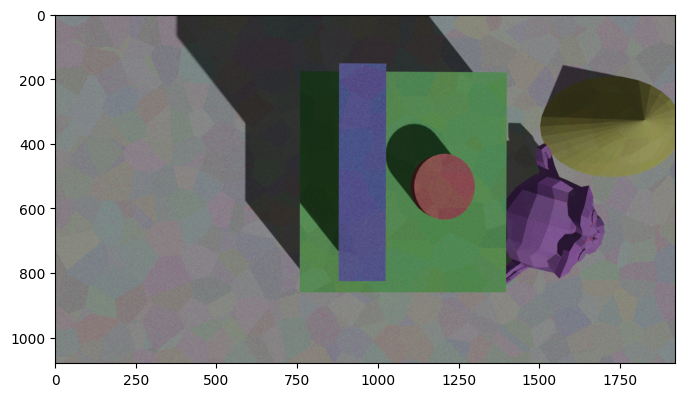

In [11]:
cv.line(next_img, (600,600), (610,600), (255,0,0), 1)
plt.imshow(next_img)

In [ ]:
cap = cv.VideoCapture("data/0001-0030.avi")
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255

ret, frame = cap.read()
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                    None,
                                    0.5, 3, 15, 3, 5, 1.2, 0)